<a href="https://colab.research.google.com/github/MarioBolanos/Metodo-de-Euler/blob/edit/Numerical_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Métodos numéricos para ecuaciones diferenciales ordinarias.


Los métodos numéricos para ecuaciones diferenciales ordinarias son métodos utilizados para encontrar aproximaciones numéricas a las soluciones de ecuaciones diferenciales ordinarias (EDO).

Muchas ecuaciones diferenciales no pueden resolverse mediante el cálculo simbólico ("análisis"). Sin embargo, para fines prácticos, como en ingeniería, una aproximación numérica a la solución a menudo es suficiente. Los algoritmos estudiados aquí se pueden usar para calcular tal aproximación. 

Las ecuaciones diferenciales constituyen una de las herramientas matemáticas más poderosas para comprender y predecir el comportamiento de los sistemas dinámicos en la naturaleza, la ingeniería y la sociedad. Un sistema dinámico es un sistema con algún estado, generalmente expresado por un conjunto de variables, que evoluciona en el tiempo. Por ejemplo, un péndulo oscilante, la propagación de una enfermedad y el clima son ejemplos de sistemas dinámicos.

# Solución de Problemas de Valor Inicial

Una ecuación diferencial de primer orden es un problema de valor inicial (IVP) de la forma:

$\dot x = f_{(t, x)}$  ,    $x_{(t=0)} = x_0$

Donde $f$ es una funcion asignada y $x_{(t=0)}$ es la condicion inicial. Se denomina de primer orden porque solo aparece la primera derivada de $x$, sin embargo  sistemas de orden superior pueden convertirse en ecuaciones de primer orden mediante la introducción de variables adicionales.

En esta seccion se describen algunos de los  métodos numericos para IVP mas importantes en la literatura.


In [0]:
import matplotlib.style
matplotlib.style.use('classic')
import numpy as np
from matplotlib import pyplot as plt

In [0]:
%matplotlib inline

## Método de Euler

Es un método iterativo que a partir de un valor inicial emplea la derivada para conocer la pendiente de la recta tangente en ese punto, para luego trazar una recta hasta el siguente valor con un incremento $h$.

Comenzando con la ecuación diferencia $\dot{x}=f_{(t, x)} $ remplazamos la derivada de $x$ por la aproximación en diferencias finitas.

$\dot{x} \approx \frac{x_{(t+h)}-x}{h}$

despues de despejar $x_{(t+h)}$ tenemos:

$x_{(t+h)} \approx x + h\dot{x}$

remplazando entonces el termino  $\dot{x}$ por $f_{(t+h)}$ y tomando la condicion inicial $x_{(t=0)}$ como $x_i$ podemos definir la ecuación iterativa como:

$x_{(i+1)} = x_{i} + hf_{(t_i, x_i)}$

donde $h$ es el tamaño de paso y el parámetro mas importante en la precisión del método. Un tamaño de paso mas pequeño incrementa la presición pero tambien incrementa el costo computacional.

**Ejemplo Ley de enfriamiento de Newton:**

Esta ley describe como un objeto con temperatura inicial de $T_{t=0}=T_0$ se enfria en un ambiente de temperatura $T_R$

In [0]:
def euler( derivadas, h, tini, tfin, x0, params ):
    ti = tini  
    xi = x0
  
    x = list()
    t = list()
  
    while ( ti < tfin ):
    
      x.append (xi)
      t.append (ti)
  
      xi = xi + h*derivadas(ti,xi,params)
      ti = ti + h
    return t, x    

# Método de Runge-Kutta de Cuarto Orden

<span style="color:red"> ** Es un método iterativo para la aproximación de soluciones de ecuaciones diferenciales ordinarias.** </span>

$k_1 = f_{(t_i, x_i)}$

$k_2 = f_{(t_i + \frac{h}{2}, x_i + \frac{k_1}{2})}$

$k_3 = f_{(t_i + \frac{h}{2}, x_i + \frac{k_2}{2})}$

$k_4 = f_{(t_i + h, x_i + k_3)}$


$x_{i+1} = x_i + \frac{h}{6}(k_1 + k_2 + k_3 + k_4)$

In [0]:
def rk4( derivadas, h, tini, tfin, x0, params ):
    ti = tini  
    xi = x0
  
    x = list()
    t = list()
  
    while ( ti < tfin ):

      x.append (xi)
      t.append (ti)
      k1 = derivadas( ti,xi,params)
      k2 = derivadas( ti + 0.5*h,xi + 0.5*k1*h,params )
      k3 = derivadas( ti + 0.5*h,xi + 0.5*k2*h,params)
      k4 = derivadas( ti + h,xi + k3*h,params) 

      xi = xi + h*(k1 + 2*k2 + 2*k3 + k4)/6
      ti = ti + h
    return t, x

## <span style="color:red"> Ex 1.</span> Comparación de métodos  

Dada la ecuación diferencial:

$\dot x = ax$

Siendo $a \in \Re$ una constante cualquiera. Grafique la solución analítica y las aproximaciones numéricas obtenidas con el método de Euler y con el método RK4.

Varíe el paso de integración $h$ a fin de observar cómo varía la precisión de los resultados numéricos a medida que éste se hace más pequeño.

In [0]:
def sistema_1(t, x, a):
    x_dot = a*x
    return x_dot

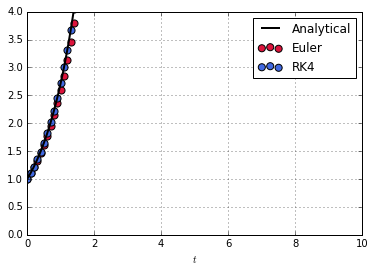

In [0]:
a = 1
h = 0.1
tini = 0
tfin = 10
x0 = 1
r=5

t = np.linspace(0,10,1001)
x = x0*np.exp(a*t)

t1,x1 = euler( sistema_1, h, tini, tfin, x0, a )
t2,x2 = rk4( sistema_1, h, tini, tfin, x0, a )


plt.figure()
# gráfica de analítica:
plt.plot(  t, x, 'black', label = 'Analytical', linewidth = 2)
# gráfica de euler:
plt.scatter( t1, x1, c = 'crimson', label = 'Euler', s = 50)
# gráfica de rk4:
plt.scatter( t2, x2, c = 'royalblue', label = 'RK4', s = 50)

plt.xlim([0, tfin])
plt.ylim([-0, 4])
plt.xlabel(r'$t$')
plt.grid()
plt.legend(loc = 'best')
plt.show()

# Método Runge-Kuta adaptativo  



# Metodo Trapesoidal 

# Euler Implicito 

# Librerias de Python

# Plano de Fase


Dada la siguiente ecuación diferencial:


$\dot{x} =  \bigl(\begin{smallmatrix}
\dot x_1\\ 
\dot x_2
\end{smallmatrix}\bigr) = \bigl(\begin{smallmatrix}
a & 0\\ 
0 & -1
\end{smallmatrix}\bigr) \bigl(\begin{smallmatrix}
x_1\\ 
x_2
\end{smallmatrix}\bigr)$


Siendo $a \in \Re $ una constante. Dibuje el plano de fase (diagrama del espacio de estados) para los siguientes valores del parámetro $a$:


 $a = -1.5$
 
 $a = -1$
 
 $a = -0.5$
 
 $a = 0$
 
 $a = 0.1$

Página 127 de *Nonlinear Dynamics and Chaos - Strogatz*

In [0]:
def sistema_2(t, x, a):
    A = np.array([[ a,0 ],[ 0,-1 ]])
    x_dot = np.matmul( A,x )
    return x_dot

(-1.0, 1.0)

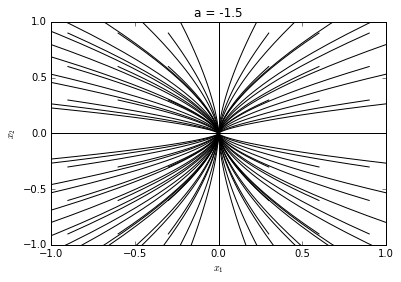

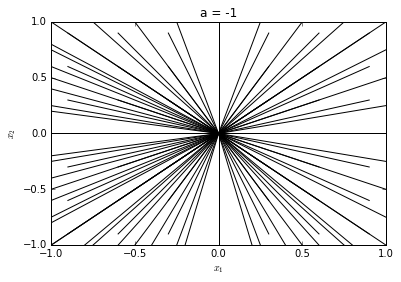

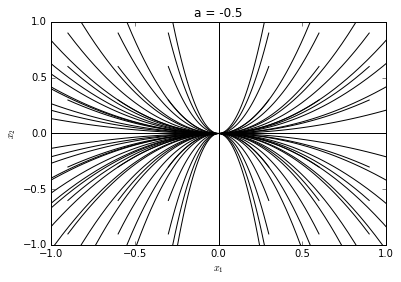

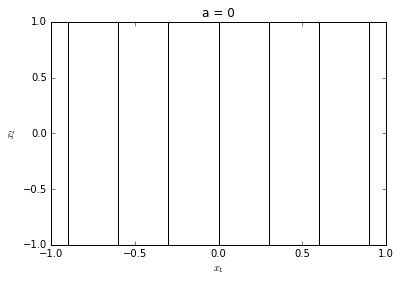

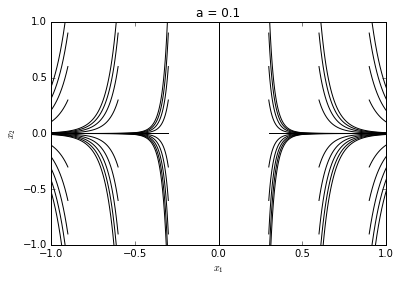

In [0]:
h = 0.1
tini = 0
tfin = 10

plt.figure()

a = -1.5
for i in range(-15,15,3):
  for j in range(-15,15,3):
    x0 = np.array([ i/10, j/10])
    t,x = rk4( sistema_2, h, tini, tfin, x0, a )
    X = np.array( x )
    plt.plot( X[:,0], X[:,1], 'black', linewidth = 1)

plt.title('a = -1.5')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.xlim([-1, 1])
plt.ylim([-1, 1])



plt.figure()
a = -1
for i in range(-15,15,3):
  for j in range(-15,15,3):
    x0 = np.array([ i/10, j/10])
    t,x = rk4( sistema_2, h, tini, tfin, x0, a )
    X = np.array( x )
    plt.plot( X[:,0], X[:,1], 'black', linewidth = 1)

plt.title('a = -1')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.xlim([-1, 1])
plt.ylim([-1, 1])


plt.figure()
a = -0.5
for i in range(-15,15,3):
  for j in range(-15,15,3):
    x0 = np.array([ i/10, j/10])
    t,x = rk4( sistema_2, h, tini, tfin, x0, a )
    X = np.array( x )
    plt.plot( X[:,0], X[:,1], 'black', linewidth = 1)

plt.title('a = -0.5')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.xlim([-1, 1])
plt.ylim([-1, 1])


plt.figure()
a = 0
for i in range(-15,15,3):
  for j in range(-15,15,3):
    x0 = np.array([ i/10, j/10])
    t,x = rk4( sistema_2, h, tini, tfin, x0, a )
    X = np.array( x )
    plt.plot( X[:,0], X[:,1], 'black', linewidth = 1)

plt.title('a = 0')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.xlim([-1, 1])
plt.ylim([-1, 1])


plt.figure()
a = 0.1
for i in range(-15,15,3):
  for j in range(-15,15,3):
    x0 = np.array([ i/10, j/10])
    t,x = rk4( sistema_2, h, tini, tfin, x0, a )
    X = np.array( x )
    plt.plot( X[:,0], X[:,1], 'black', linewidth = 1)

plt.title('a = 0.1')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.xlim([-1, 1])
plt.ylim([-1, 1])
